# Task 1 and 2

Download data for the specific protein RdhA (reductive dehalogenase) as fasta-file and alternatively genbank format. Use Biopython seq and seqrecord objects to rad, manipulate and export sequences. Then count the number of downloaded sequences, average length, length distribution etc.

In [1]:
# install packages
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import seaborn as sns
import matplotlib.pyplot as plt

### read in fasta files

In [2]:
#read in fasta file
sequences_fasta = SeqIO.parse("RdhA_Dehalococcoides_strain_CBDB1_sequence.fasta", "fasta")

#create empty lists
sequence_32RdhA = [] #sequences
sequence_32RdhA_id = [] #ids of the sequences
sequence_32RdhA_len = [] #length of the sequences
sequence_32RdhA_description = [] #description of the sequence

#save the sequences, their ids and length to 3 different lists
for sequence in sequences_fasta:
    sequence_32RdhA_len.append(len(sequence)) 
    sequence_32RdhA.append(str(sequence.seq)) #.seq returns the sequence
    sequence_32RdhA_id.append(str(sequence.id)) #.id returns the id of the sequence
    sequence_32RdhA_description.append(str(sequence.description)) #.description returns the description of the sequence
    

### read in genbank files

In [3]:
#read in genbank file
sequence_genbank = SeqIO.parse("RdhA_Dehalococcoides_strain_CBDB1_sequence.gp", "genbank")

#print sequences, their ids and length
for sequence in sequence_genbank:
    print(sequence.id)
    print(repr(sequence.seq))
    print(len(sequence))

CAI83653.1
Seq('MSKFHSMVSRRDFMKGLGMAGAGIGAVAASAPVFHDIDELIASDTAVQPRPWWV...YGK')
500
CAI83647.1
Seq('MGNFHSSLSRRDFMKGLGLAGAGIGAVAAAAPVFHDLDEVASADSSVNKRPWWV...YGK')
492
CAI83644.1
Seq('MKEFHSTLSRRDFMKSLGVVGAGLGTMSAAAPVFHDLDEVTSSTLGINKNPWWV...TSY')
495
CAI83638.1
Seq('MSRFHSMVSRRDFMKAVGLAGAGLGASAAISPVFHDVDEFMSSPTAEWKRPWYV...KDY')
475
CAI83621.1
Seq('MPNFHSIVSRRDFVKALGLTGAGLGTAAAATPVFQDLDDVTASPSAEWKRPWWV...GSY')
499
CAI83618.1
Seq('MKTFHSTLSRRDFMKALGLAGAGIGAVSAAAPVFHDVDELTASSGGVQKLPWWV...TSY')
494
CAI83612.1
Seq('MLNFHSTLTRKDFLKGIGLAGAGLGAASAVTPMFHDLDELVASTPSTRNLPWFV...TSY')
495
CAI83606.1
Seq('MAQFHSVLSRRDFMKGLGLAGAGVGAAAAVSPVFRDLDEMASAPSARVNMPWWV...TSI')
491
CAI83602.1
Seq('MIKKHSTVSRRDFMKGLGLAGAGIGAAAAVTPVFHDLDELMSSSQATLSRPWYI...LRQ')
505
CAI83599.1
Seq('MNQFHSTVSRRDFMKGLGLTGVTLGSASALSPQFRDLDELANSAKVVNKRGWWV...LRQ')
505
CAI83594.1
Seq('MNISHSTLSRRDFMKGLGLAGAGLGAVAASAPVFHDVDELTSLGSNVNKYPWYV...TTA')
507
CAI83586.1
Seq('MVKSHSTLNRRDFMKALGFVGAGVGALSAGSPVFKDLDEMASAGSSNKRAWWIK...SRY')
465
CAI8

### length characteristics

In [4]:
#get number of sequences
numberof_sequences = len(sequence_32RdhA)
print(numberof_sequences)

#calculate the average length of all sequences
average_len = (sum(sequence_32RdhA_len)/len(sequence_32RdhA))
print(average_len)


32
495.5


Text(0.5, 0, 'length')

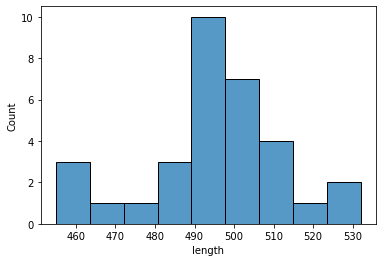

In [5]:
#plot length distribution
sns.histplot(data=sequence_32RdhA_len)
plt.xlabel("length")

[52, 52, 41, 43, 50, 37, 39, 42, 43, 43, 52, 43, 47, 43, 43, 46, 44, 38, 40, 51, 29, 30, 40, 41, 50, 31, 48, 46, 33, 45, 36]
[0.1, 0.11, 0.08, 0.09, 0.1, 0.07, 0.08, 0.09, 0.09, 0.09, 0.1, 0.09, 0.09, 0.08, 0.09, 0.09, 0.1, 0.08, 0.09, 0.1, 0.06, 0.06, 0.08, 0.08, 0.09, 0.06, 0.09, 0.1, 0.07, 0.09, 0.07]
[18, 17, 16, 15, 19, 18, 19, 13, 29, 24, 30, 19, 20, 25, 25, 24, 13, 21, 22, 29, 16, 22, 29, 17, 28, 22, 24, 13, 16, 30, 33]
[0.04, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.03, 0.06, 0.05, 0.06, 0.04, 0.04, 0.05, 0.05, 0.05, 0.03, 0.04, 0.05, 0.06, 0.03, 0.05, 0.06, 0.03, 0.05, 0.04, 0.05, 0.03, 0.03, 0.06, 0.07]


Text(0.5, 6.79999999999999, 'percentage of character in sequence')

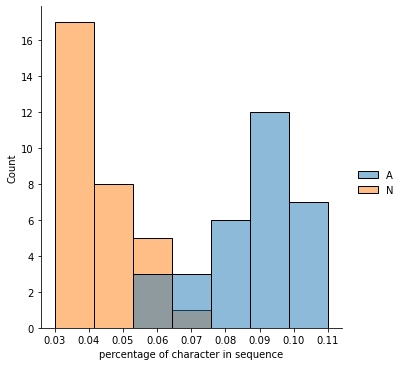

In [6]:
#empty lists
numberofA=[]
percentageA=[]
numberofN=[]
percentageN=[]

#count number of As and Ns in the sequences and calculate their percentage in the sequences
for i in range(numberof_sequences-1):
    numberofA.append(sequence_32RdhA[i].count("A"))
    percentageA.append(round(numberofA[i]/len(sequence_32RdhA[i]),2))
    numberofN.append(sequence_32RdhA[i].count("N"))
    percentageN.append(round(numberofN[i]/len(sequence_32RdhA[i]),2))
    
#print results        
print(numberofA)
print(percentageA)
print(numberofN)
print(percentageN)

#plot the percentage of the characters in sequences
import pandas as pd
sns.displot(pd.DataFrame({"A": percentageA, "N": percentageN}))
plt.xlabel("percentage of character in sequence")


### Manipulation

In [7]:
# get sequence 1
sequence1 = sequence_32RdhA[0]
print(sequence1)


MSKFHSMVSRRDFMKGLGMAGAGIGAVAASAPVFHDIDELIASDTAVQPRPWWVKERPIDDPTIEVDFGMMERHDGRDQGQSARVRAIYYGADRVLGAAALSAAELAERTASNYPGYTYRSRALAGSFKRVSQGTSPGWAETKDPAPVKTPEERGEPKWTGTPEEASRMLRAAMRAYGASLVGYTELTQEHRDHVIFSYEKGDSNNEKYIGTTIPVTAARPIVFENVPKAYETTEKLVIPNVPLWEIALSTQGSNELWRSAGTLLGGMANGNTFYNCANLHASTYNFLRYLGYQLIGTIGNDARYVGSEGGAAIMAGLGEASRQKLYTLTPEYGAPGRLYGVLTDLPLEPTHPIDAGIYRFCHSCQKCADSCPPQCISKEKEPSWDLPLTEGKETIYSVKGTKAFYNNLPLCRQYSNETSHGCRICWGECTFTVNRGALVHQIIKGTIANIPLFNTYFYKLGDAFGYGTDPEKAEAWWDLSLPTLGQDSTIVAADAGYGK


In [8]:
#slicing sequence 1 / take the first 10 elements
sequence1_first10 = sequence_32RdhA[0][:10]
print(sequence1_first10)

MSKFHSMVSR


In [9]:
#concatenate sequence 1 and test_sequence
test_sequence = Seq("TEST")
test_conc_seq1 = test_sequence+sequence_32RdhA[0]
print(test_conc_seq1)


TESTMSKFHSMVSRRDFMKGLGMAGAGIGAVAASAPVFHDIDELIASDTAVQPRPWWVKERPIDDPTIEVDFGMMERHDGRDQGQSARVRAIYYGADRVLGAAALSAAELAERTASNYPGYTYRSRALAGSFKRVSQGTSPGWAETKDPAPVKTPEERGEPKWTGTPEEASRMLRAAMRAYGASLVGYTELTQEHRDHVIFSYEKGDSNNEKYIGTTIPVTAARPIVFENVPKAYETTEKLVIPNVPLWEIALSTQGSNELWRSAGTLLGGMANGNTFYNCANLHASTYNFLRYLGYQLIGTIGNDARYVGSEGGAAIMAGLGEASRQKLYTLTPEYGAPGRLYGVLTDLPLEPTHPIDAGIYRFCHSCQKCADSCPPQCISKEKEPSWDLPLTEGKETIYSVKGTKAFYNNLPLCRQYSNETSHGCRICWGECTFTVNRGALVHQIIKGTIANIPLFNTYFYKLGDAFGYGTDPEKAEAWWDLSLPTLGQDSTIVAADAGYGK


In [10]:
#empty list
seq_mod = []

# replace M with X in all sequences
for i in sequence_32RdhA:
    mod = i.replace("M","X")
    seq_mod.append(mod)
    
print(seq_mod)


['XSKFHSXVSRRDFXKGLGXAGAGIGAVAASAPVFHDIDELIASDTAVQPRPWWVKERPIDDPTIEVDFGXXERHDGRDQGQSARVRAIYYGADRVLGAAALSAAELAERTASNYPGYTYRSRALAGSFKRVSQGTSPGWAETKDPAPVKTPEERGEPKWTGTPEEASRXLRAAXRAYGASLVGYTELTQEHRDHVIFSYEKGDSNNEKYIGTTIPVTAARPIVFENVPKAYETTEKLVIPNVPLWEIALSTQGSNELWRSAGTLLGGXANGNTFYNCANLHASTYNFLRYLGYQLIGTIGNDARYVGSEGGAAIXAGLGEASRQKLYTLTPEYGAPGRLYGVLTDLPLEPTHPIDAGIYRFCHSCQKCADSCPPQCISKEKEPSWDLPLTEGKETIYSVKGTKAFYNNLPLCRQYSNETSHGCRICWGECTFTVNRGALVHQIIKGTIANIPLFNTYFYKLGDAFGYGTDPEKAEAWWDLSLPTLGQDSTIVAADAGYGK', 'XGNFHSSLSRRDFXKGLGLAGAGIGAVAAAAPVFHDLDEVASADSSVNKRPWWVREVDKPTIEIDWSKTSSLPFPQEGCHLPPLLAEFVGWDRVNSAXAQGVAALNAGAKKTGSKEAISLLDTSXQEAAWPHFIAHAGWREPVYPALEGAAPIPELVGQTYTHESFGVPRWESTPEENFALLKSAXRFFGAGQIASIELDANVKSXFYPVDASRXFFNGPPXAYGFEDCDNGYVTDTHFIIPNKARWVVTYTTPXPKEXYRTAPSGVCYAANXSRYRLNQETXACVQKFLLGLGYQGLQSAPWPNGICPSPAVATLSGLGEXDRINQCVIPEEGAVVGIYKFITDLPLPVSKPIDFGAFRFCHSCRKCADTCPAKAISFEEEPTWEPAGPWSTGGKKAYYKNEPECKLYQHSTGATCQICTGVCVFNVNTKAXIHEIVKSTLSTTGIFNSFLWKADVAFGYGHHDAAEWWDLDLPRYGFDTTXGVRDGGYGK',

### export fasta file

In [11]:
#empty list
records=[]

#save informations for fasta file to records
for i in range(len(sequence_32RdhA)):
    records.append(SeqRecord(Seq(sequence_32RdhA[i]),id=sequence_32RdhA_id[i], description=sequence_32RdhA_description[i]))

#save records as fasta file    
SeqIO.write(records, "example.fasta", "fasta")

32